In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import glob, os
import salem
import matplotlib.pyplot as plt
import seaborn as sns
from oggm import utils
import cartopy.crs as ccrs
sns.set_context('paper')
sns.set_style('whitegrid')

In [2]:
# Get the RGI summary
mdf = pd.read_hdf(utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5'))

In [15]:
mdf['O2Region'] = ['{:02d}-{:02d}'.format(int(d1), int(d2)) for d1, d2 in zip(mdf.O1Region, mdf.O2Region)]

In [16]:
df = salem.read_shapefile('/home/mowglie/disk/Data/GIS/SHAPES/RGI/RGI_V6/00_rgi60_regions/00_rgi60_O1Regions.shp')
dfsr = salem.read_shapefile('/home/mowglie/disk/Data/GIS/SHAPES/RGI/RGI_V6/00_rgi60_regions/00_rgi60_O2Regions.shp')

In [17]:
fac = 5
mdf['CenLonC'] = np.round(mdf.CenLon * fac).astype(int)
mdf['CenLatC'] = np.round(mdf.CenLat * fac).astype(int)
mdf['CenC'] = ['{}_{}'.format(lon, lat) for lon, lat in zip(mdf['CenLonC'], mdf['CenLatC'])]

In [18]:
selids = []
for i, g in mdf.groupby('CenC'):
    dis = (g.CenLon - g.CenLonC/fac)**2 + (g.CenLat - g.CenLatC/fac)**2
    selids.append(dis.idxmin())

In [19]:
smdf = mdf.loc[selids]
len(smdf)

14962

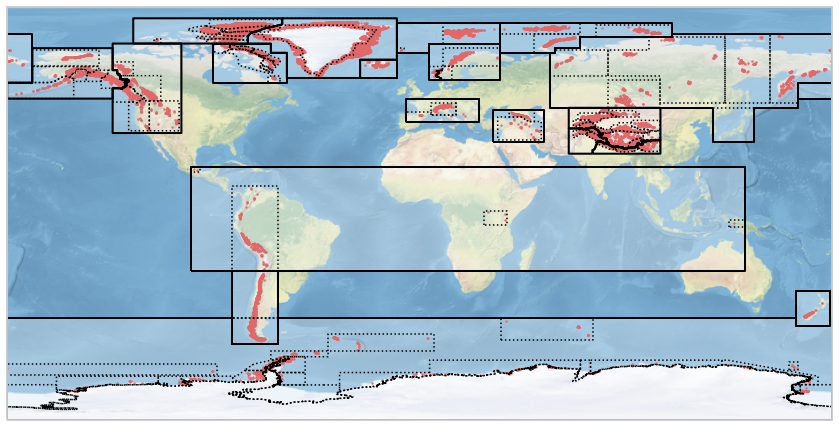

In [20]:
sns.set_context('talk')

f = plt.figure(figsize=(12, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.stock_img()
# ax.add_feature(cartopy.feature.COASTLINE
# ax.coastlines('50m')

ax.scatter(smdf.CenLon.values, smdf.CenLat.values, color='C3', marker='.', s=3)
# ax.scatter(dfr.lon.values, dfr.lat.values, edgecolor='k', facecolor='tab:cyan', s=24)

df.plot(ax=ax, transform=ccrs.PlateCarree(), edgecolor='k', facecolor='w', alpha=0.3);

dfsr.plot(ax=ax, transform=ccrs.PlateCarree(), edgecolor='k', linestyle=':', facecolor='none');
df.plot(ax=ax, transform=ccrs.PlateCarree(), edgecolor='k', facecolor='none', linewidth=2);


did1 = False
did10 = False
for i, r in df.iterrows():
    tx = r.min_x + 2
    ty = r.min_y + 2
    fs = 12
    t = r.RGI_CODE
    if t == 1:
        tx = r.min_x + 35
        if did1:
            continue
        did1 = True
    if t == 5:
        tx = r.min_x + 19
    if t == 6:
        ty = r.min_y - 7.
    if t == 8:
        tx = r.min_x + 26
    if t == 11:
        tx = r.min_x - 8.5
    if t == 10:
        ty = r.min_y + 17
        if not did10:
            did10 = True
            continue
    if t == 13:
        ty = r.min_y + 11
        tx = r.min_x + 18
    if t == 15:
        tx = r.min_x + 21
    if t == 17:
        ty = r.min_y + 25
    if t == 18:
        ty = r.min_y + 17
        
#     ax.text(tx, ty, t, transform=ccrs.PlateCarree(), 
#             ha='left', va='bottom', fontsize=fs, 
#             bbox=dict(facecolor='w', edgecolor='k', alpha=0.7))

# letkm = dict(color='black', ha='left', va='top', fontsize=16,
#              bbox=dict(facecolor='white', edgecolor='black'))
# ax.text(-178, 88.2, 'a', **letkm)   
    
plt.tight_layout();
plt.savefig('rgi_subreg_map.pdf', bbox_inches='tight');

In [21]:
reg_names, subreg_names = utils.parse_rgi_meta(version='6')

In [22]:
area_per_reg = mdf[['Area', 'O2Region']].groupby('O2Region').sum()
area_per_reg['N Glaciers'] = mdf.groupby('O2Region').count().Name
area_per_reg['RegName'] = ['{}: {} '.format(i, subreg_names.loc[i].values[0]) for i in area_per_reg.index]

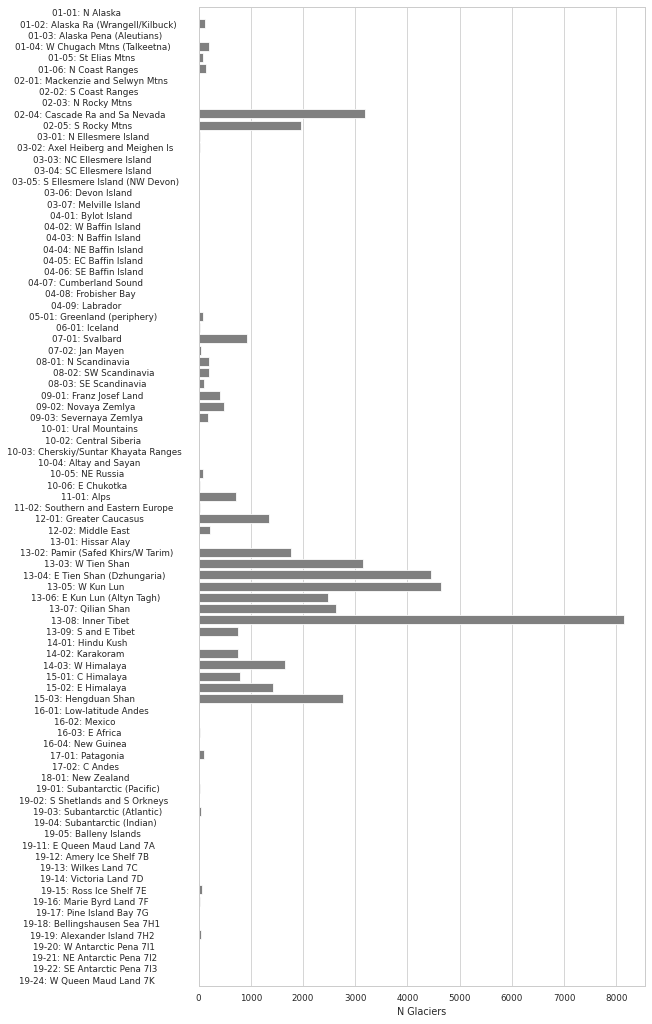

In [23]:
sns.set_context('paper')
f, ax = plt.subplots(1, 1, figsize=(8, 18))
sns.barplot(x="N Glaciers", y='RegName', data=area_per_reg, color='Grey');
plt.ylabel('');
plt.savefig('rgi_subreg_nglaciers.pdf', bbox_inches='tight');

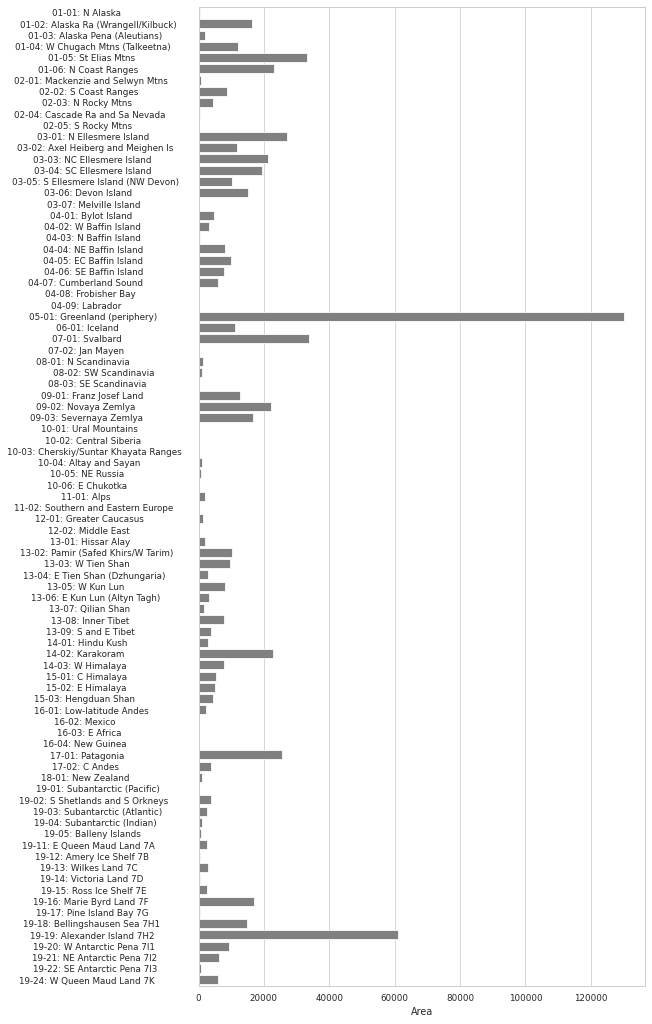

In [24]:
sns.set_context('paper')
f, ax = plt.subplots(1, 1, figsize=(8, 18))
sns.barplot(x="Area", y='RegName', data=area_per_reg, color='Grey');
plt.ylabel('');
plt.savefig('rgi_subreg_area.pdf', bbox_inches='tight');